# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100225., 100213.,  99704., 100118., 100144.,  99815.,  99588.,
         99919.,  99973., 100301.]),
 array([ 1.00007858, 10.90006914, 20.80005971, 30.70005027, 40.60004083,
        50.50003139, 60.40002195, 70.30001251, 80.20000307, 90.09999363,
        99.99998419]),
 <BarContainer object of 10 artists>)

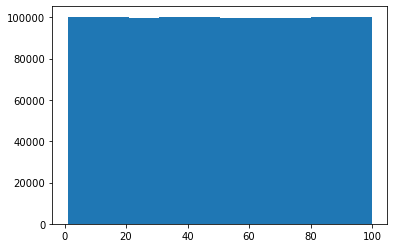

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [5]:
data = np.random.randn(1000000)

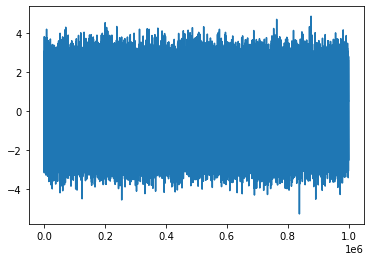

In [6]:
x = range(1,1000001)
plt.plot(x, data)

(array([4.50000e+01, 1.46100e+03, 2.14640e+04, 1.30955e+05, 3.27847e+05,
        3.41924e+05, 1.47750e+05, 2.65780e+04, 1.91400e+03, 6.20000e+01]),
 array([-4.91509266, -3.94112896, -2.96716525, -1.99320155, -1.01923785,
        -0.04527414,  0.92868956,  1.90265327,  2.87661697,  3.85058068,
         4.82454438]),
 <BarContainer object of 10 artists>)

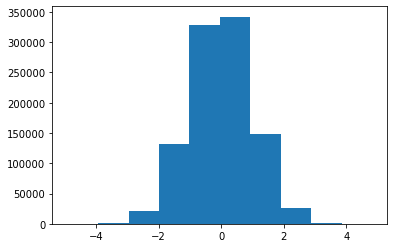

In [6]:
%matplotlib inline
plt.hist(data)

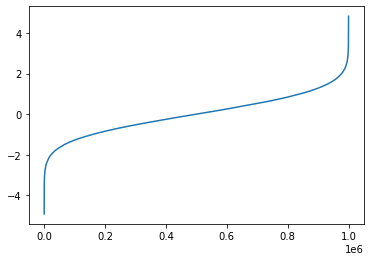

In [7]:
plt.plot(x,sorted(data))

(array([  14.,  112.,  599., 1668., 2836., 2715., 1514.,  461.,   76.,
           5.]),
 array([-4.09669474, -2.15591378, -0.21513282,  1.72564815,  3.66642911,
         5.60721008,  7.54799104,  9.48877201, 11.42955297, 13.37033394,
        15.3111149 ]),
 <BarContainer object of 10 artists>)

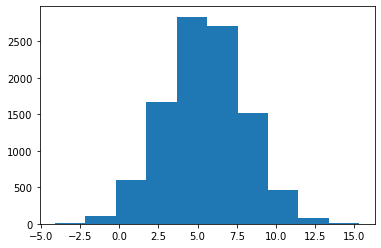

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.85342834, -1.14429888, -0.26537781, -0.54632198],
       [ 2.00172696,  0.81143169, -0.1785435 , -0.58144784]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z <= 1 \rightarrow$ estamos dentro del círculo.
    * Si $z > 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [15]:
x = np.random.uniform(0,1,1000000)
y = np.random.uniform(0,1,1000000)
print(x,y)

[0.94592713 0.23586875 0.37808094 ... 0.67536274 0.38341617 0.22112514] [0.55694935 0.32759594 0.88949162 ... 0.51072465 0.39276328 0.7295547 ]


In [16]:
z = np.sqrt(x*x + y*y )
print(z)

[1.09771158 0.40367458 0.96650946 ... 0.84673166 0.54888155 0.76232958]


In [17]:

(sum(z <= 1)/1000000)*4

3.143616

In [18]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

In [ ]:
pi_montecarlo(100000, 100000)

### Dummy Data Sets

In [0]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [14]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.002164,1.499644,18.508191
std,0.999902,2.501756,7.794876
min,-4.614127,-11.344276,5.000005
25%,-0.673665,-0.187840,11.749997
50%,0.002129,1.502898,18.506363
75%,0.678266,3.187172,25.261393
max,4.553337,13.301662,31.999969


(array([1.22000e+02, 2.50800e+03, 2.81180e+04, 1.40963e+05, 3.15165e+05,
        3.24594e+05, 1.52739e+05, 3.25730e+04, 3.09000e+03, 1.28000e+02]),
 array([-4.61412738, -3.69738095, -2.78063452, -1.86388809, -0.94714166,
        -0.03039522,  0.88635121,  1.80309764,  2.71984407,  3.6365905 ,
         4.55333693]),
 <a list of 10 Patch objects>)

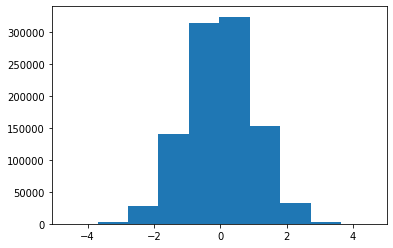

In [15]:
plt.hist(data["A"])

(array([1.20000e+01, 8.29000e+02, 1.39770e+04, 1.01506e+05, 3.00478e+05,
        3.64624e+05, 1.79885e+05, 3.57100e+04, 2.90300e+03, 7.60000e+01]),
 array([-11.34427637,  -8.87968257,  -6.41508878,  -3.95049498,
         -1.48590119,   0.9786926 ,   3.4432864 ,   5.90788019,
          8.37247399,  10.83706778,  13.30166157]),
 <a list of 10 Patch objects>)

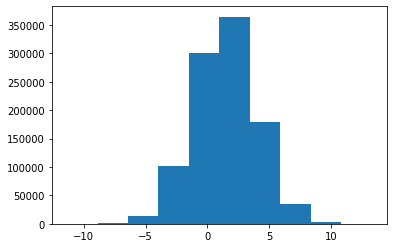

In [16]:
plt.hist(data["B"])

(array([ 99574., 100661.,  99456.,  99788., 100310.,  99741.,  99869.,
        100111., 100293., 100197.]),
 array([ 5.00000455,  7.70000101, 10.39999746, 13.09999392, 15.79999037,
        18.49998682, 21.19998328, 23.89997973, 26.59997619, 29.29997264,
        31.99996909]),
 <a list of 10 Patch objects>)

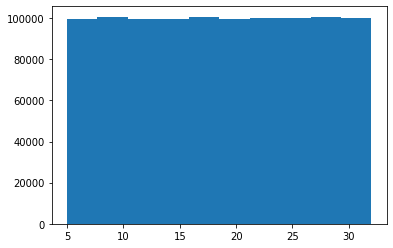

In [17]:
plt.hist(data["C"])

In [0]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [0]:
colum_names = data.columns.values.tolist()

In [21]:
a = len(colum_names)
a

21

In [0]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }
)

In [23]:
new_data

,Column Name,A,B
42,State,0.009601,0.571675
43,Account Length,1.127091,0.203394
44,Area Code,1.413309,0.426407
45,Phone,1.335081,0.190180
46,Int'l Plan,-0.828382,0.156801
47,VMail Plan,0.608314,0.255236
48,VMail Message,-1.529998,0.688072
49,Day Mins,0.463638,0.638551
50,Day Calls,-0.419050,0.900912
51,Day Charge,0.180764,0.204704


In [0]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)